In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# **MIMIC**

## **Loading data and creating Signals objects**

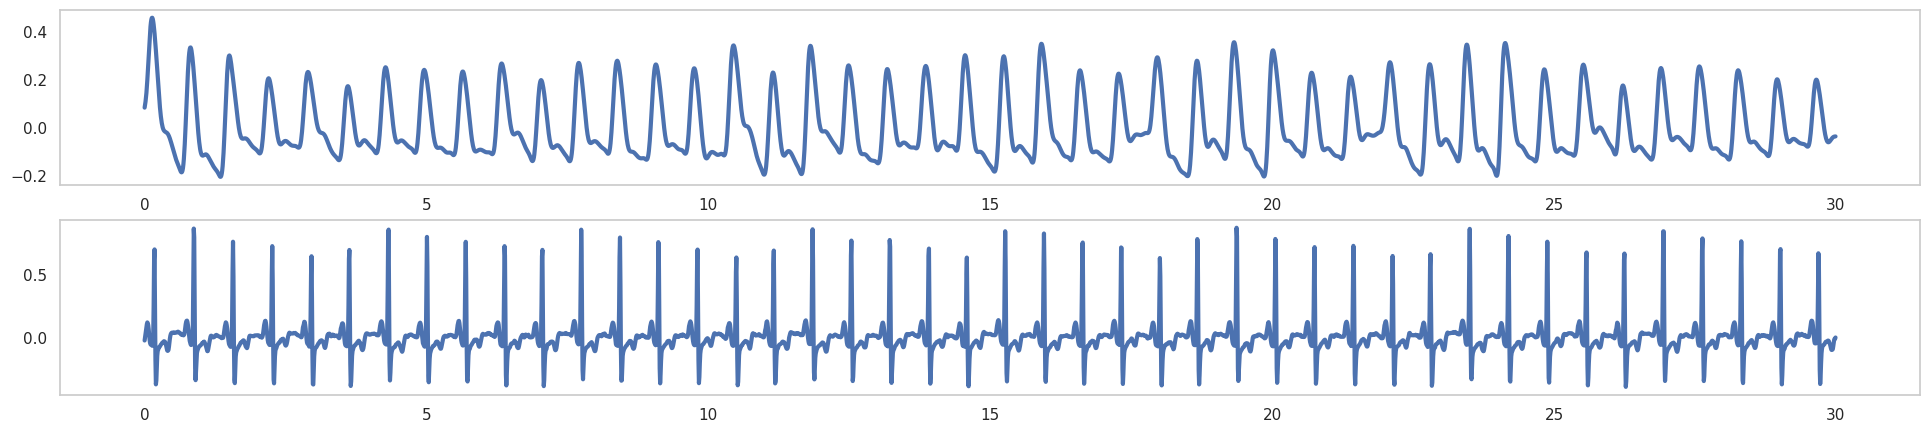

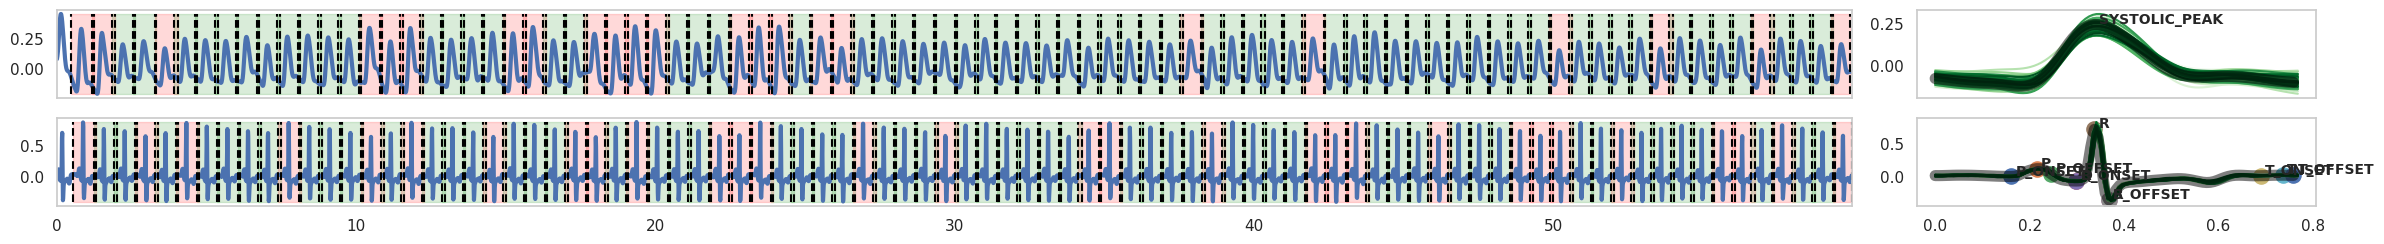

In [2]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[222]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_to_peak=True)
measurement.set_agg_beat()
ecg_sig = measurement['ecg']

fig, axes = plt.subplots(2, 1, figsize=(24, 5))
measurement.plot(0, 30, axes=axes)
measurement.plot_beats_segmentation(invalid=False)

In [35]:
ecg_sig.extract_critpoints_features(False)

{'p_times_entropy': 0.7992827343148758,
 'p_times_zero_num_crosses': 0,
 'p_times_zero_pos_cross_std': -1,
 'p_times_zero_neg_cross_std': -1,
 'p_times_mean_num_crosses': 46,
 'p_times_mean_pos_cross_std': 1.582445016866292,
 'p_times_mean_neg_cross_std': 1.5534552264213692,
 'p_times_percentile_5': 0.21728000000000003,
 'p_times_percentile_25': 0.21728000000000003,
 'p_times_percentile_75': 0.22504000000000002,
 'p_times_percentile_95': 0.22504000000000002,
 'p_times_median': 0.22504000000000002,
 'p_times_mean': 0.22139218390804596,
 'p_times_std': 0.0038849753102922152,
 'p_times_var': 1.5093033161580093e-05,
 'p_times_root_mean_square': 0.22139218390804596,
 'p_times_kurtosis': -1.9440970838394216,
 'p_times_skew': -0.144405841073923,
 'p_times_energy': 4.265574515200003,
 'p_times_auc': 19.261119999999995,
 'p_vals_entropy': 4.465908118654583,
 'p_vals_zero_num_crosses': 0,
 'p_vals_zero_pos_cross_std': -1,
 'p_vals_zero_neg_cross_std': -1,
 'p_vals_mean_num_crosses': 57,
 'p_vals

{'basic__entropy': 3.6396889372757397,
 'basic__zero_num_crosses': 176,
 'basic__zero_pos_cross_std': 1.3119570642188758,
 'basic__zero_neg_cross_std': 1.2398884193252229,
 'basic__mean_num_crosses': 712,
 'basic__mean_pos_cross_std': 15.388372736359113,
 'basic__mean_neg_cross_std': 21.29880856248333,
 'basic__mean': 0.2918509186351706,
 'basic__median': 0.2755905511811024,
 'basic__std': 0.16610085818977965,
 'basic__var': 0.027589495091381293,
 'basic__kurtosis': 18.38771556353594,
 'basic__skew': 3.2856043895034572,
 'basic__percentile_5': 0.1649606299212602,
 'basic__percentile_25': 0.23622047244094488,
 'basic__percentile_75': 0.31496062992125984,
 'basic__percentile_95': 0.4251968503937008,
 'basic__root_mean_square': 2226.0472440943304,
 'basic__energy': 845.748403496812,
 'basic__auc': 2226.0472440943304,
 'peaks_troughs__peaks__entropy': 4.462481251069089,
 'peaks_troughs__peaks__zero_num_crosses': 0,
 'peaks_troughs__peaks__zero_pos_cross_std': -1,
 'peaks_troughs__peaks__ze

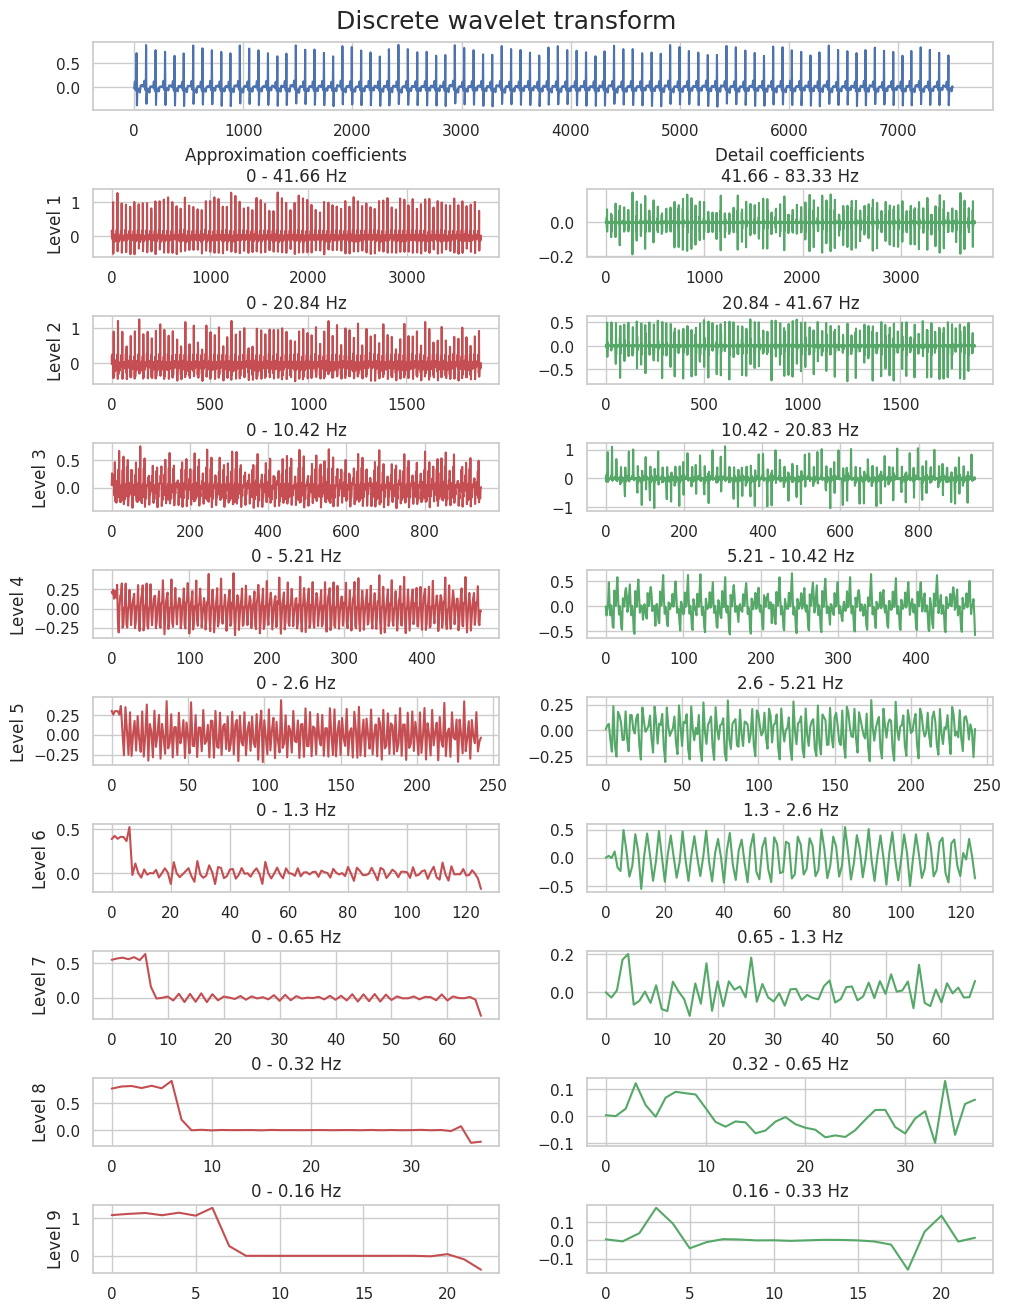

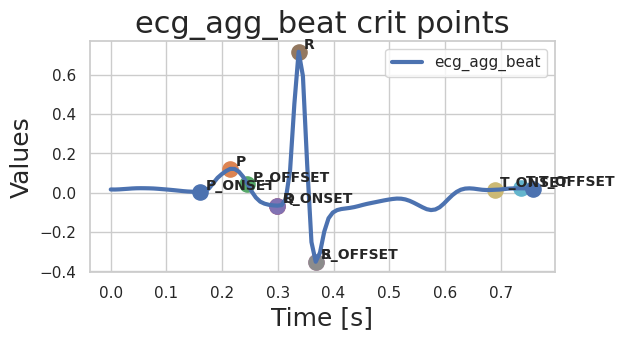

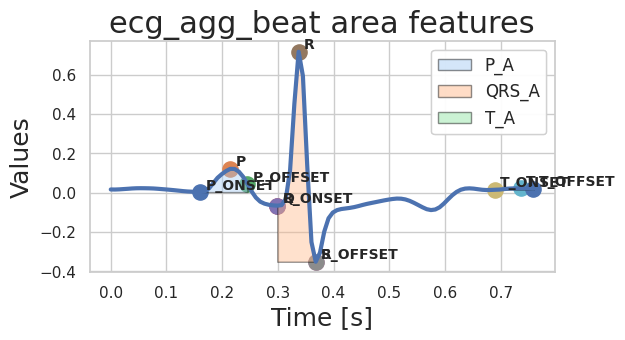

In [4]:
ecg_sig.extract_features(False, True)

# **PTB-XL**

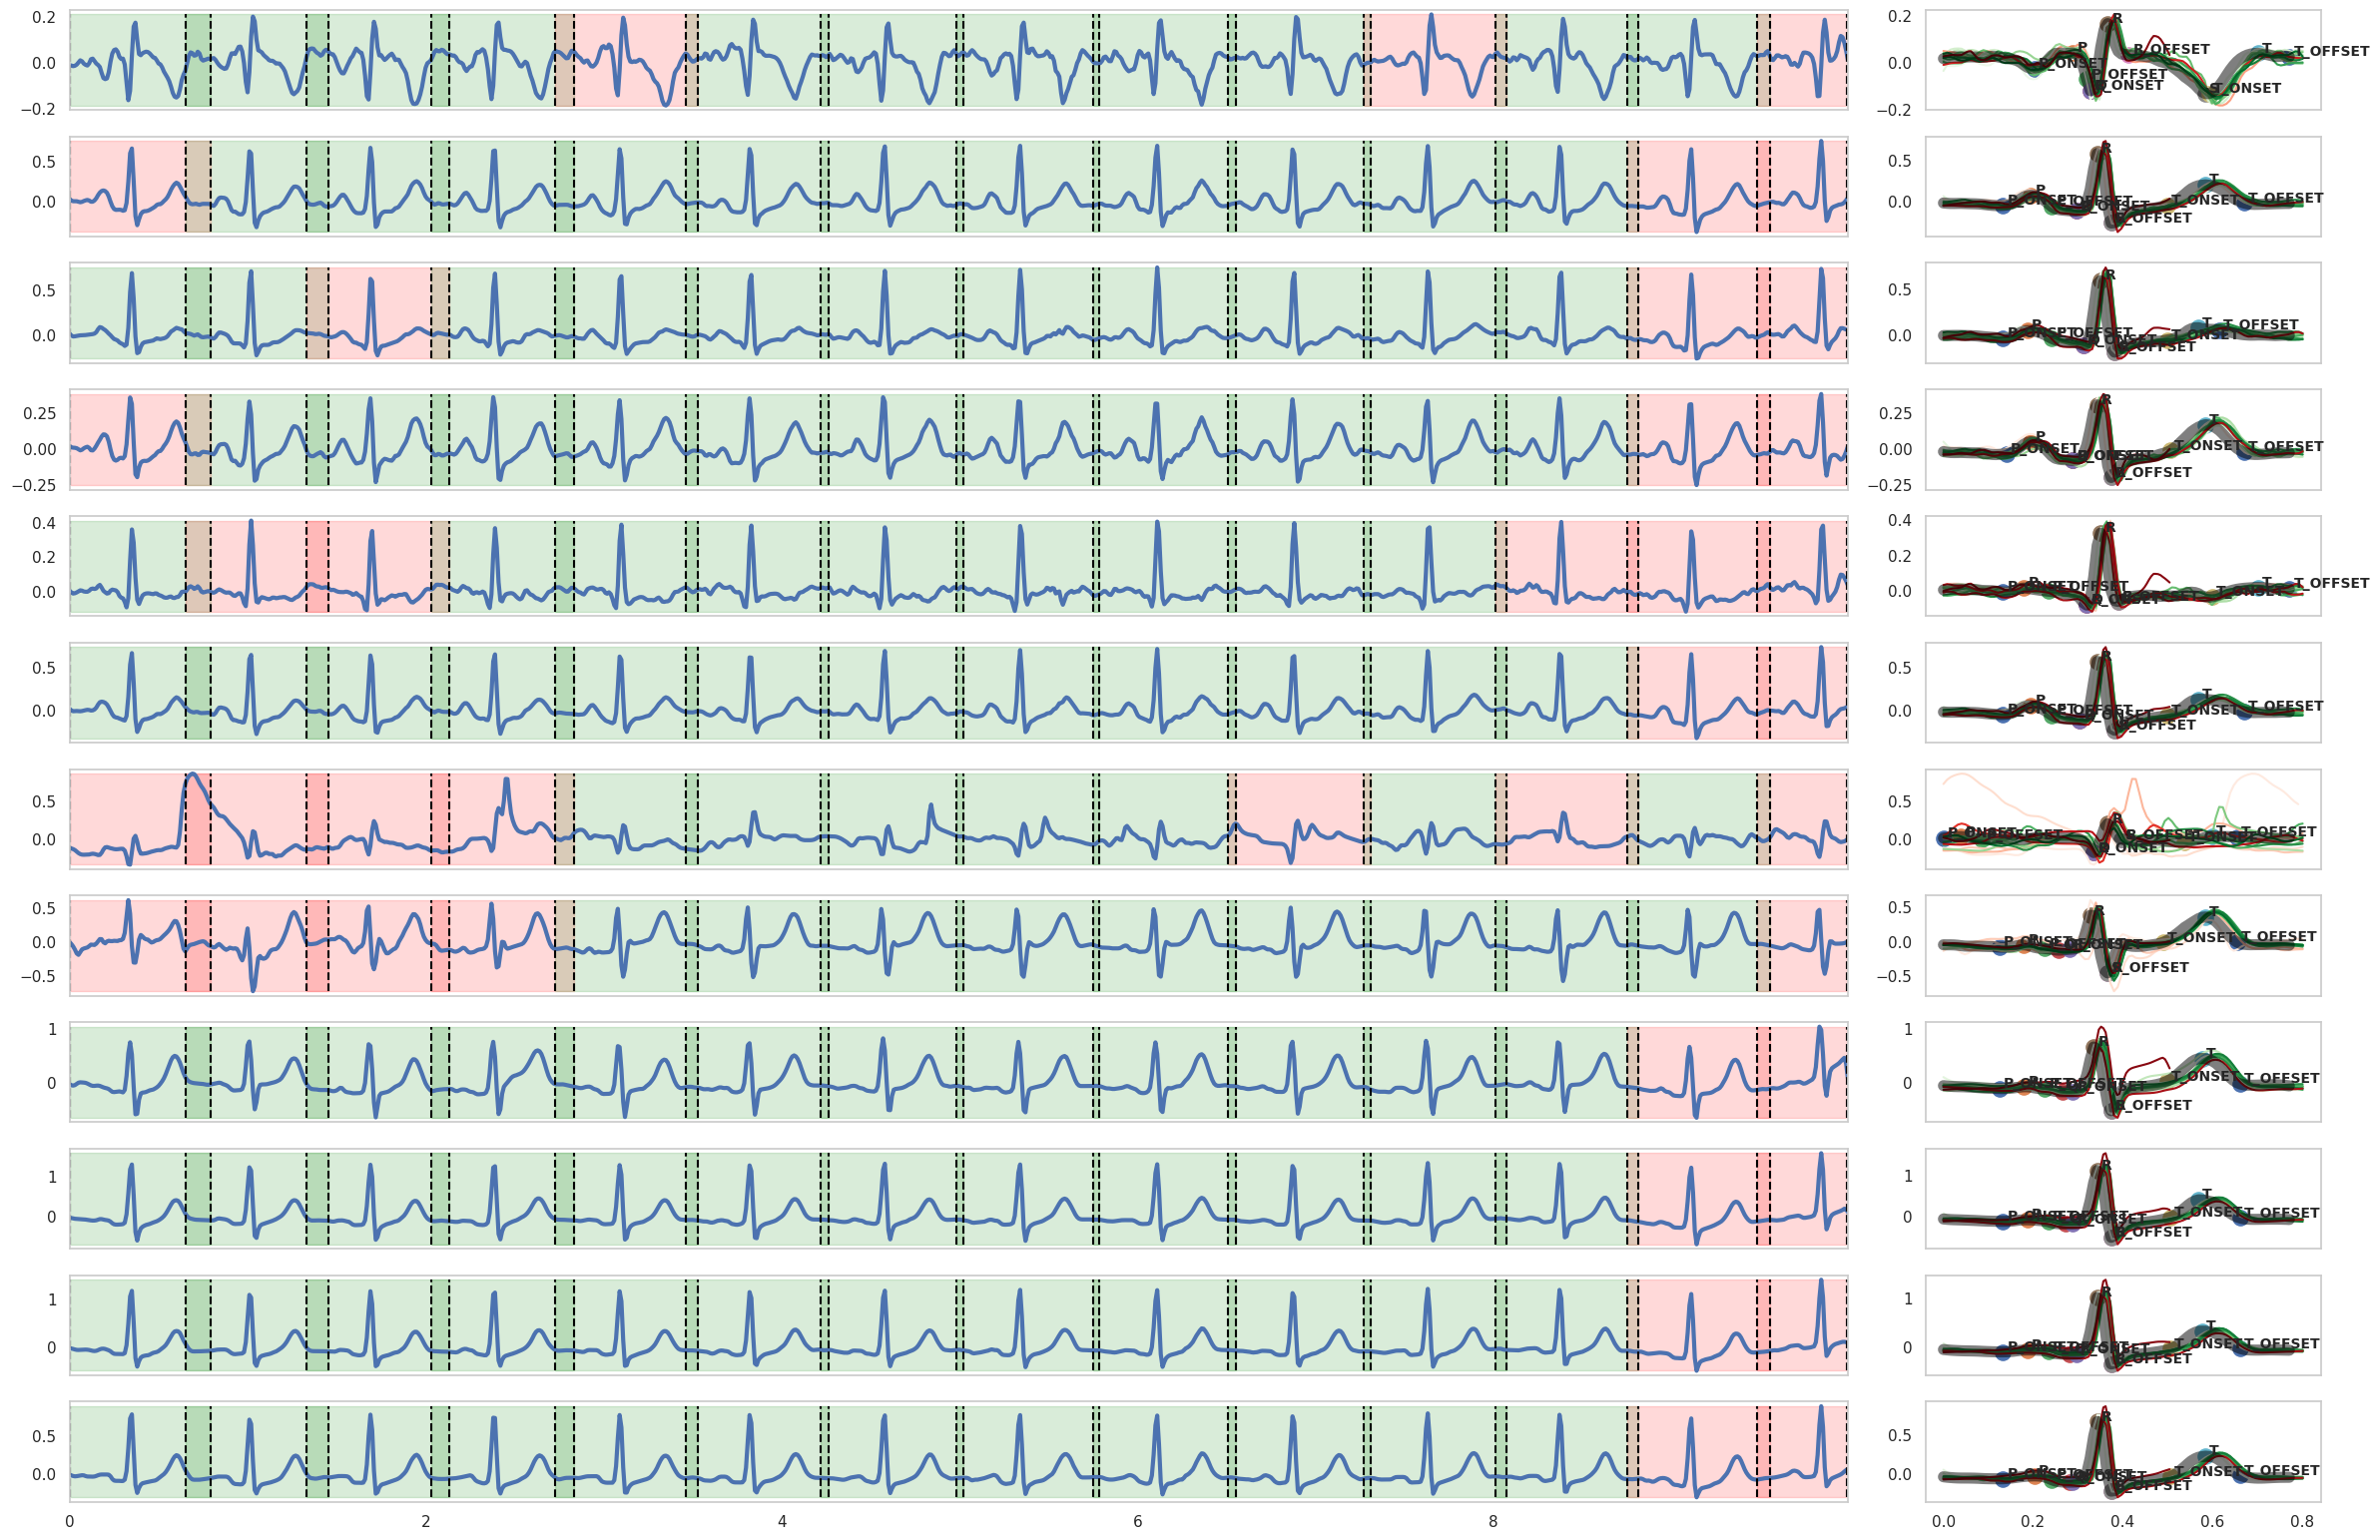

In [15]:
from msr.data.download.ptbxl import load_ptbxl_raw_tensors_for_split, FS
from msr.data.measurements import PtbXLMeasurement

data, targets = load_ptbxl_raw_tensors_for_split("train", "diagnostic_class")
data, targets = data.numpy(), targets.numpy()
# idx = 3570
idx = 12

sample = data[idx]
measurement = PtbXLMeasurement(*sample.T, fs=FS)
measurement.set_beats(source_channel='ecg_2', align_peaks_loc=False)
measurement.set_agg_beat()
ecg_sig = measurement['ecg_1']
measurement.plot_beats_segmentation(invalid=False)

/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_

ValueError: x and y arrays must have at least 2 entries

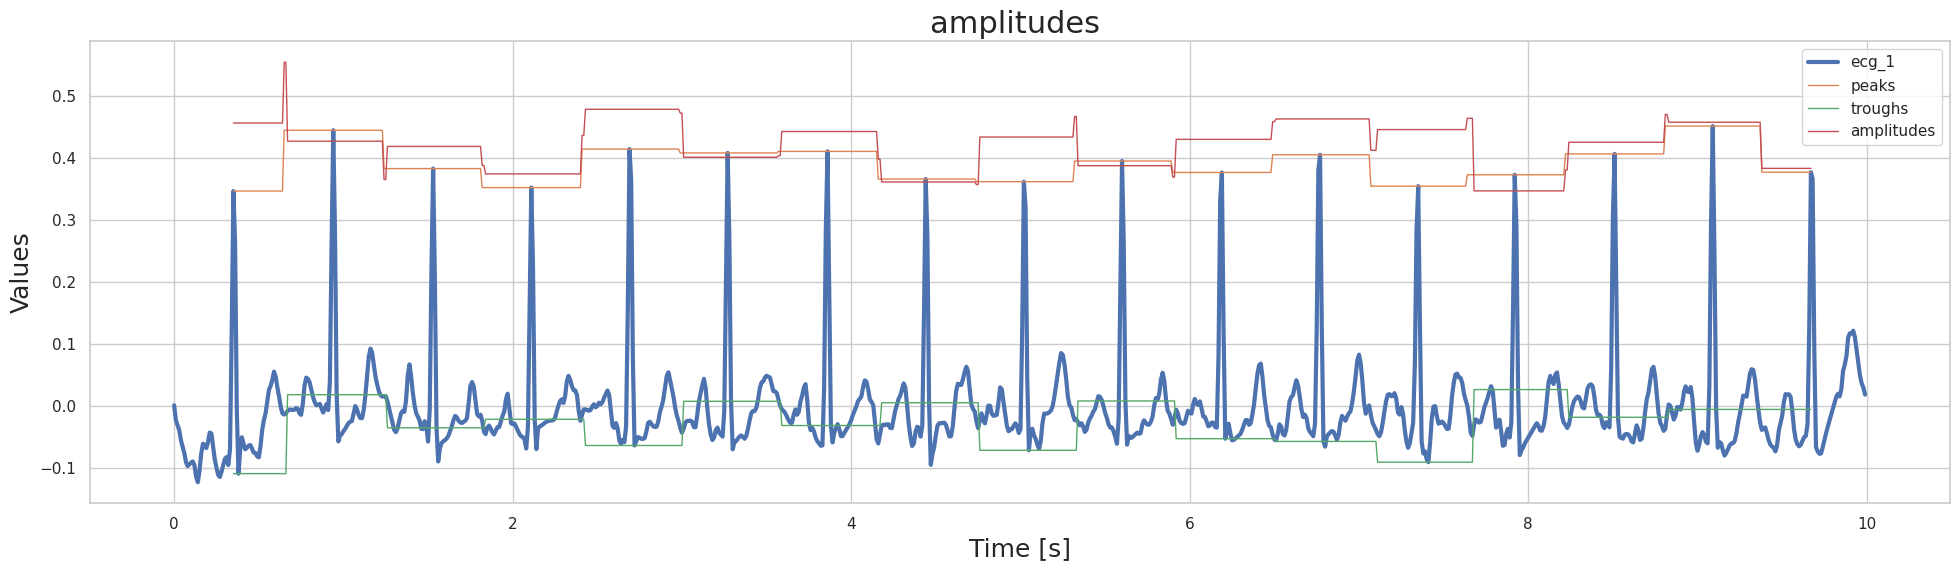

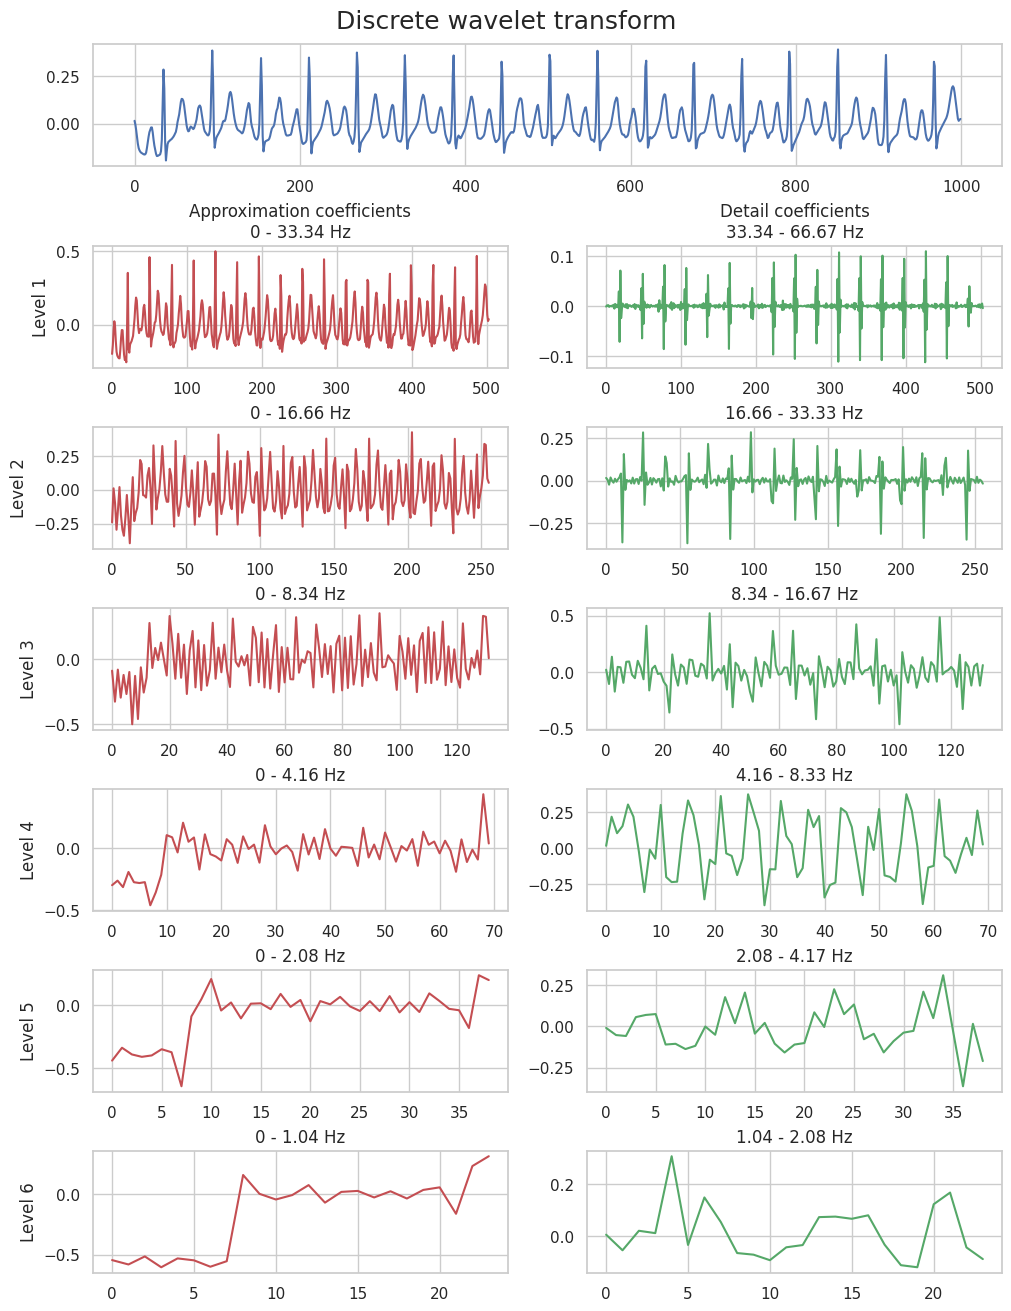

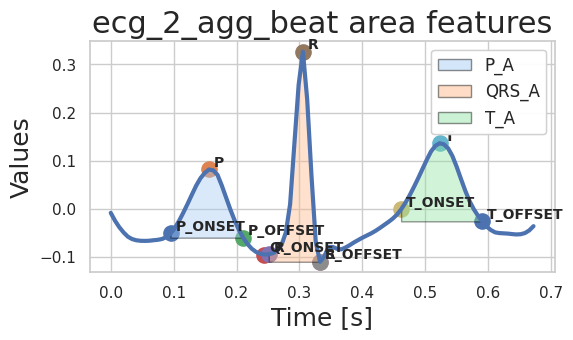

In [3]:
_ = measurement.extract_features(return_arr=False, plot=True)

In [16]:
for name, sig in measurement.signals.items():
    print(name)
    sig.extract_features(return_arr=False, plot=False)

ecg_1
ecg_2
ecg_3
ecg_4
ecg_5
ecg_6
ecg_7
ecg_8
ecg_9
ecg_10
ecg_11
ecg_12


/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


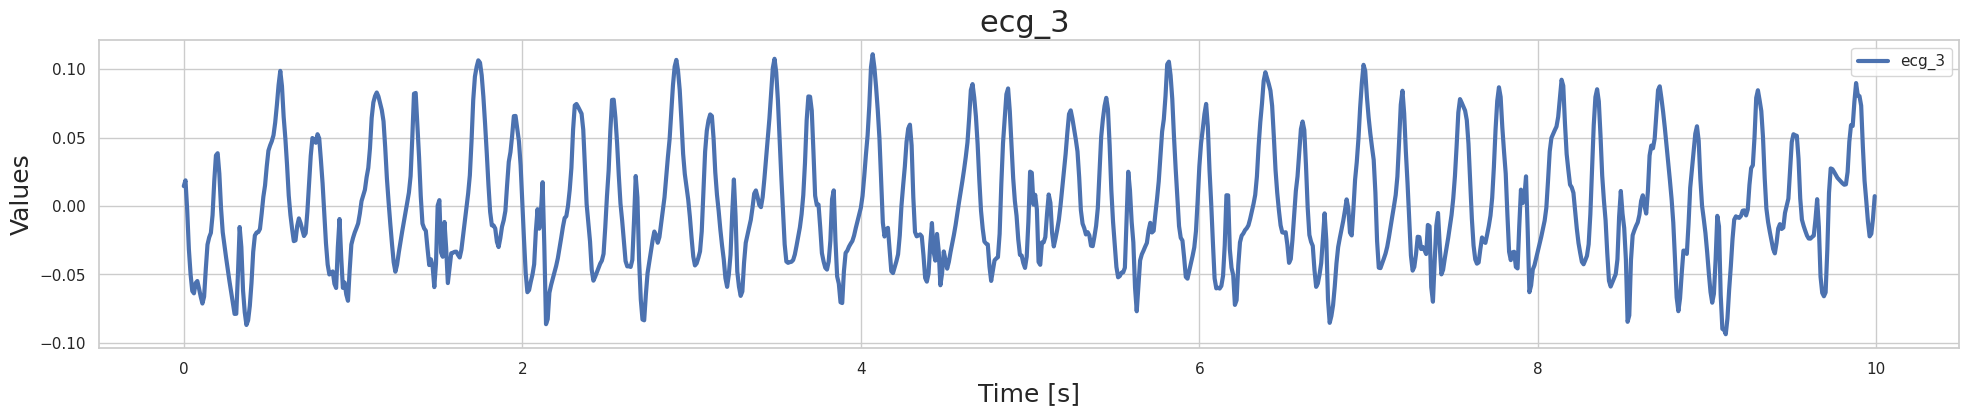

In [11]:
measurement['ecg_3'].plot()

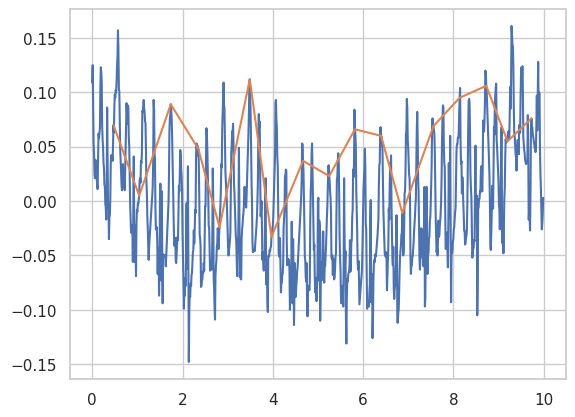

In [14]:
plt.plot(measurement['ecg_3'].time, measurement['ecg_3'].data)
plt.plot(measurement['ecg_3'].time[measurement['ecg_3'].peaks], measurement['ecg_3'].data[measurement['ecg_3'].peaks])

